In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats

In [2]:
data = pd.read_csv("Titaninsurance.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,salesperson_id,old_scheme,new_scheme
0,ID_IN085,57,62
1,ID_YH087,103,122
2,ID_CW031,59,54
3,ID_ZO080,75,82
4,ID_NZ038,84,84


In [5]:
df.shape

(30, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   salesperson_id  30 non-null     object
 1   old_scheme      30 non-null     int64 
 2   new_scheme      30 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 852.0+ bytes


In [7]:
df.describe()

,old_scheme,new_scheme
count,30.000000,30.000000
mean,68.033333,72.033333
std,20.455980,24.062395
min,28.000000,32.000000
25%,54.000000,55.000000
50%,67.000000,74.000000
75%,81.500000,85.750000
max,110.000000,122.000000


<Axes: >

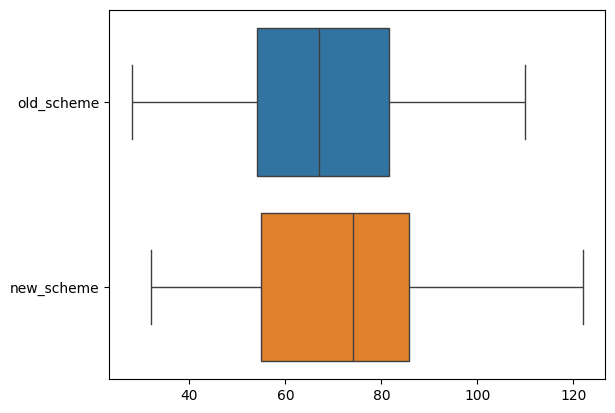

In [8]:
sns.boxplot(df[["old_scheme","new_scheme"]], orient='h')

## Hypothesis Testing

### Step 1: Define null and alternative hypotheses

The null and alternative hypotheses can be formulated as:

> $H_0:$ The mean monthly output from the new scheme is equal to that from the old scheme. <br>
$H_a:$ The mean output from the new scheme is greater than that from the old scheme.

Let $\mu_1$ and $\mu_2$ be the mean output from the new scheme and the mean output from the old scheme respectively.

Mathematically, the above formulated hypotheses can be written as:

> $H_0: \mu_1 = \mu_2 $ <br>
$H_a: \mu_1 > \mu_2 $

### Step 2: Select Appropriate test

This is a case of a one-tailed test for comparing the means from two populations. As we are comparing two means calculated at different times from the same set of people, the two groups become related (dependent). Also, the population standard deviations are unknown. Hence, a two-sample paired t-test is the most appropriate test for this case.

**Two-sample Paired t-test**

In a two-sample paired t-test, we compare the means from two dependent (related) populations to check if they differ significantly. We are provided that the sample is randomly selected.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [14]:
output_new_scheme = df["new_scheme"]
output_old_scheme = df["old_scheme"]

### Step 5: Calculate the p-value

- We will use the `ttest_rel` function from the `scipy.stats` library to perform a two-sample paired t-test.
- The `ttest_rel()` function takes the sample observations from the two groups, and the direction of the alternative hypothesis as input and returns the test statistic and the p-value for the test. 
    - The sample observations are the monthly outputs of the salespersons with respect to the old and the new scheme
    - As it is a one-tailed test, we will compare the mean output from the new scheme with the old scheme by setting the argument `alternative = 'greater'`

In [15]:
from scipy.stats import ttest_rel

test_stat, p_value = ttest_rel(output_new_scheme, output_old_scheme, alternative = 'greater')
print('The p-value is: {}'.format(round(p_value,4)))

The p-value is: 0.0653


### Step 6: Compare the p-value with $\alpha$

In [18]:
if p_value < 0.05:
    print(f"As the p-value {round(p_value,4)} is less than the level of significance, we reject the null hypothesis")
else:
    print(f"As the p-value {round(p_value,4)} is greater than the level of significance, we fail to reject the null hypothesis")

As the p-value 0.0653 is greater than the level of significance, we fail to reject the null hypothesis


### Step 7: Draw Inference

At 5% significance level, we fail to reject the null hypothesis. Hence we do not have enough statistical evidence to say that the mean monthly outcome from the new scheme is greater than that from the old scheme.